<a href="https://colab.research.google.com/github/dsouzafi/ia_espm/blob/main/P11A_IA_Reg_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="Topo"></a>
# Regressão Linear usando Python

O modelo de **Regressão Linear** é uma técnica estatística utilizada na **aprendizagem supervisionada**.

Este modelo, na sua forma multivariada, é representado pela seguinte fórmula:

$$
\hat{Y}_{i}=\alpha +\beta _{1}\cdot X_{1i}+\beta _{2}\cdot X_{2i}+...+\beta _{k}\cdot X_{ki}
$$

em que


> $\hat{Y}_{i}$ é o valor estimado da variável dependente $Y$


> $X_{ki}$ são as variáveis independentes (ou preditoras)



> $\alpha$ e $\beta _{k}$ são os parâmetros de ajuste do modelo

Vamos seguir estes passos para executar um projeto de aprendizado de máquina usando a Regressão Linear:

1. [Descrever o problema e identificar suas características](#Item-1)
2. [Importar as bibliotecas necessárias](#Item-2)
3. [Carregar, explorar e visualizar o conjunto de dados (*dataset*)](#Item-3)
4. [Lidar com os *outliers*](#Item-4)
5. [Limpar os dados](#Item-5)
6. [Dividir os dados em um conjunto de treinamento e um de teste](#Item-6)
7. [Ajustar um modelo de regressão linear](#Item-7)
8. [Aplicar o modelo no conjunto de teste e fazer uma previsão](#Item-8)
9. [Avaliar o desempenho do modelo](#Item-9)
10. [Criar uma interface para testar o modelo usando o *Gradio*](#Item-10)

<a name="Item-1"></a>
## 1. Descrever o problema e identificar suas características

O objetivo de uma imobiliária da cidade de Santos é estimar o valor de venda dos imóveis da sua carteira a partir das características levantadas das vendas que foram realizadas no último ano.

Da sua base de dados, foi obtido um conjunto de dados com as seguintes características:

* Bairro
* Tipo do imóvel
* Quantidade de dormitórios
* Quantidade de suítes
* Quantidade de banheiros
* Quantidade de vagas na garagem
* Átea útil do imóvel ($m^{2}$)
* Valor de venda (kR$)

Claramente temos uma tarefa típica de aprendizado supervisionado, uma vez que temos exemplos *rotulados* de treinamento (cada instância vem com o resultado esperado, ou seja o valor de venda de cada imóvel). Além disso, também é uma tarefa típica de regressão, já que é solicitado que se faça a previsão de um valor. Mais especificamente, trata-se de um problema de regressão múltipla, uma que o sistema utilizará múltiplas características para fazer a previsão.

[Voltar ao topo](#Topo)

<a name="Item-2"></a>
## 2. Importar as bibliotecas necessárias
Aqui são importados todos os pacotes necessários para a execução do projeto de aprendizado de máquina.

In [1]:
import numpy as np #biblioteca de matemática para trabalhar com matrizes
import matplotlib.pyplot as plt #biblioteca para criar visualizações gráficas
import pandas as pd #biblioteca para importação, manipulação e análises de estruturas de dados
import seaborn as sns #biblioteca para visuzalição estatística dos dados
import statsmodels.api as sm #biblioteca para a estimação de modelos estatísticos
from pandas.plotting import scatter_matrix #função para visualizar uma matriz de dispersão
from sklearn.model_selection import train_test_split #do pacote Scikit-Lear, função para dividir o conjunto de dados em um conjunto de teste e um de treinamento
from sklearn.linear_model import LinearRegression #do pacote Scikit-Learn, função para fazer o ajuste da regressão linear
from sklearn.metrics import mean_squared_error, r2_score #do pacote Scikit-Learn, funções para medidr o erro médio e o coeficiente de determinação
!pip install gradio -q #biblioteca para criar demonstrações dos modelos de aprendizado de máquina
import gradio as gr

     |████████████████████████████████| 6.1 MB 7.6 MB/s 
     |████████████████████████████████| 112 kB 45.8 MB/s 
     |████████████████████████████████| 57 kB 4.4 MB/s 
     |████████████████████████████████| 212 kB 47.0 MB/s 
     |████████████████████████████████| 54 kB 1.6 MB/s 
     |████████████████████████████████| 2.3 MB 46.3 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 84 kB 2.5 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 270 kB 42.6 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 80 kB 4.0 MB/s 
     |████████████████████████████████| 68 kB 5.5 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 4.0 MB 42.6 MB/s 
     |████████████████████████████████| 856 kB 12.2 MB/s 
     |████████████████████████████████| 594 kB 52.3 MB/s 


[Voltar ao topo](#Topo)

<a name="Item-3"></a>
## 3. Carregar, explorar e visualizar o conjunto de dados (*dataset*)

In [2]:
#carregar o dataset e visualizar as cinco linhas superiores da tabela
df = pd.read_csv("https://raw.githubusercontent.com/dsouzafi/ia_espm/main/datasets/imoveis.csv")
df.head()

,Imovel,Cidade,Bairro,Tipo do imovel,Dormitorio,Suite,Banheiro,Vaga,Area Util,Valor de venda
0,1,Santos,Boqueirao,Apartamento,2,0,1,1,74,300.0
1,2,Santos,Boqueirao,Apartamento,2,1,1,1,100,470.0
2,3,Santos,Gonzaga,Apartamento,2,0,2,1,83,350.0
3,4,Santos,Jose Menino,Apartamento Sala Living,1,0,1,1,35,175.0
4,5,Santos,Encruzilhada,Apartamento,2,1,2,1,68,470.0


In [3]:
#descrição dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Imovel          61 non-null     int64  
 1   Cidade          61 non-null     object 
 2   Bairro          61 non-null     object 
 3   Tipo do imovel  61 non-null     object 
 4   Dormitorio      61 non-null     int64  
 5   Suite           61 non-null     int64  
 6   Banheiro        61 non-null     int64  
 7   Vaga            61 non-null     int64  
 8   Area Util       61 non-null     int64  
 9   Valor de venda  61 non-null     float64
dtypes: float64(1), int64(6), object(3)
memory usage: 4.9+ KB


In [4]:
#resumo das categorias dos atributos qualitativos
df["Tipo do imovel"].value_counts()

Apartamento                55
Apartamento Sala Living     3
Apartamento Kitchenette     1
Apartamento Cobertura       1
Flat                        1
Name: Tipo do imovel, dtype: int64

In [5]:
#resumo dos atributos numéricos
df.describe()

,Imovel,Dormitorio,Suite,Banheiro,Vaga,Area Util,Valor de venda
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,31.000000,2.196721,0.967213,2.114754,1.393443,111.770492,611.230492
std,17.752934,0.945510,1.182754,1.367459,0.842193,86.265751,578.454698
min,1.000000,0.000000,0.000000,0.000000,0.000000,27.000000,114.310000
25%,16.000000,2.000000,0.000000,1.000000,1.000000,64.000000,285.000000
50%,31.000000,2.000000,1.000000,2.000000,1.000000,84.000000,400.000000
75%,46.000000,3.000000,1.000000,3.000000,2.000000,127.000000,695.000000
max,61.000000,4.000000,4.000000,6.000000,5.000000,550.000000,2800.000000


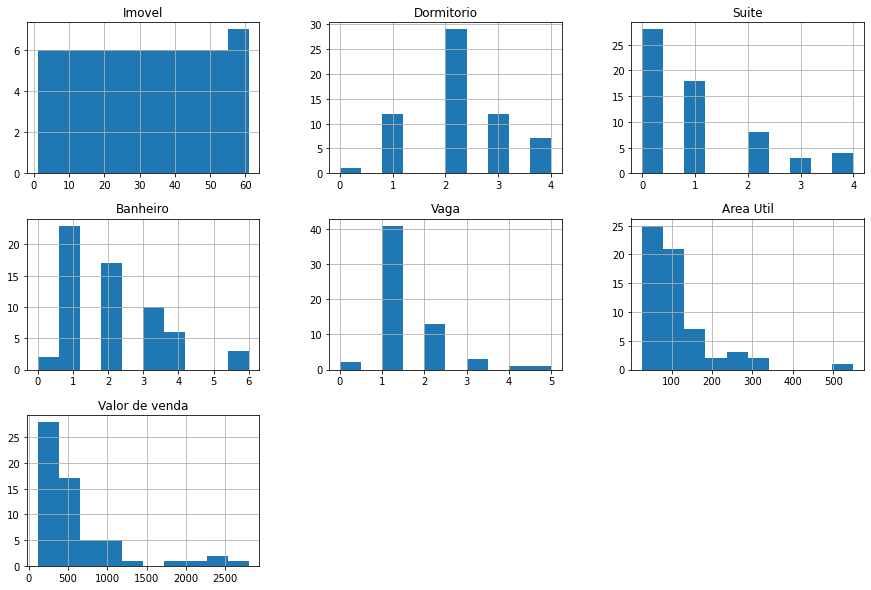

In [6]:
#histograma dos atributos numéricos
df.hist(figsize=(15,10))
plt.show()

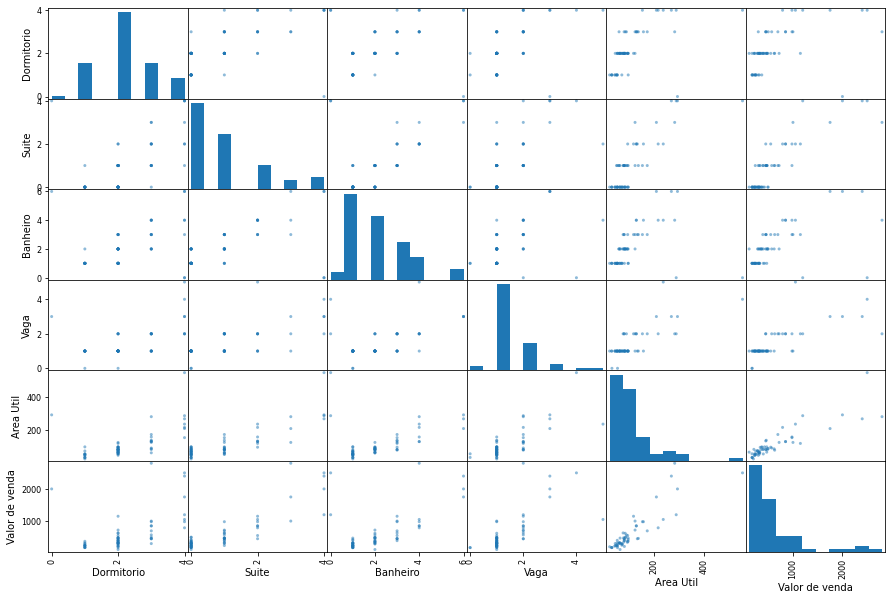

In [7]:
#matriz de dispersão para analisar a correlação entre os atributos numéricos
atributos = ["Dormitorio","Suite","Banheiro","Vaga","Area Util","Valor de venda"]
scatter_matrix(df[atributos], figsize=(15,10));

[Voltar ao topo](#Topo)

<a name="Item-4"></a>
## 4. Lidar com os *outliers*
Vamos avaliar se existem valores extremos (*outliers*) que devem ser retirados do conjunto de dados.

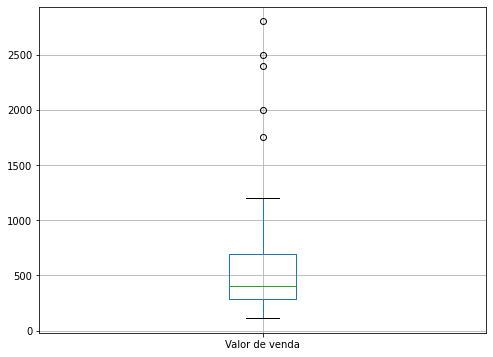

In [8]:
#Boxplot para visualizar os outliers
df.boxplot('Valor de venda', figsize=(8,6));

A partir do boxplot pode-se ver se há *outliers*. Caso haja, a seguinte função pode ser usada para removê-los:

In [9]:
#Função para encontrar os limites superior e inferior a fim de identificar e remover os outliers
def interQuartile(x):
  percentile25= x.quantile(0.25)
  percentile75=x.quantile(0.75)
  iqr=percentile75-percentile25
  upperLimit= percentile75+1.5*iqr
  lowerLimit= percentile25-1.5*iqr
  return upperLimit, lowerLimit

upper,lower = interQuartile(df['Valor de venda'])
print("Limite inferior = ", lower, "| Número de pontos abaixo do limite inferior = ", (df['Valor de venda'] < lower).sum())
print("Limite inferior = ", upper, "| Número de pontos acima do limite superior = ", (df['Valor de venda'] > upper).sum())

Limite inferior =  -330.0 | Número de pontos abaixo do limite inferior =  0
Limite inferior =  1310.0 | Número de pontos acima do limite superior =  5


[Voltar ao topo](#Topo)

<a name="Item-5"></a>
## 5. Limpar os dados
Já identificamos algumas características que não nos interessam e valores que devem ser removidos (os *outliers*). Vamos, então, fazer a limpeza dos dados.

In [10]:
#remover as caracaterísticas que não interessam
ndf = df.drop(["Imovel", "Cidade", "Bairro", "Tipo do imovel"], axis=1)
ndf.head()

,Dormitorio,Suite,Banheiro,Vaga,Area Util,Valor de venda
0,2,0,1,1,74,300.0
1,2,1,1,1,100,470.0
2,2,0,2,1,83,350.0
3,1,0,1,1,35,175.0
4,2,1,2,1,68,470.0


In [18]:
#remover as instâncias dos valores acima ou abaixo dos limites de outlier
#esta etapa deve ser executada até que não haja mais outliers
ndf.drop(ndf.index[ndf['Valor de venda'] > upper], inplace=True)
ndf.drop(ndf.index[ndf['Valor de venda'] < lower], inplace=True)
ndf.describe()

,Dormitorio,Suite,Banheiro,Vaga,Area Util,Valor de venda
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,1.893617,0.446809,1.659574,1.085106,77.382979,361.448085
std,0.633625,0.582667,0.730592,0.408059,28.524248,144.902147
min,1.000000,0.000000,1.000000,0.000000,27.000000,114.310000
25%,1.500000,0.000000,1.000000,1.000000,57.500000,244.000000
50%,2.000000,0.000000,2.000000,1.000000,76.000000,330.000000
75%,2.000000,1.000000,2.000000,1.000000,89.500000,455.000000
max,3.000000,2.000000,3.000000,2.000000,175.000000,720.000000


In [19]:
#verificar se ainda há outliers
#se houver, executar a etapa anterior novamente
upper,lower = interQuartile(ndf['Valor de venda'])
print("Limite inferior = ", lower, "| Número de pontos abaixo do limite inferior = ", (ndf['Valor de venda'] < lower).sum())
print("Limite inferior = ", upper, "| Número de pontos acima do limite superior = ", (ndf['Valor de venda'] > upper).sum())

Limite inferior =  -72.5 | Número de pontos abaixo do limite inferior =  0
Limite inferior =  771.5 | Número de pontos acima do limite superior =  0


[Voltar ao topo](#Topo)

<a name="Item-6"></a>
## 6. Dividir os dados em um conjunto de treinamento e um de teste
Nesta etapa, as variáveis independentes e dependentes são definidas primeiro e, em seguida, o conjunto de dados é dividido em dados de treinamento e teste. Uma proporção de 80-20 é usada nesta implementação para treinamento e teste, respectivamente.

In [20]:
#Definir as variáveis dependentes e independentes
y = ndf['Valor de venda'] #a variável dependente é "Valor de venda""
x = ndf.drop(['Valor de venda'], axis=1)
#dividindo os dados
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

[Voltar ao topo](#Topo)

<a name="Item-7"></a>
## 7. Ajustar um modelo de regressão linear
Nesta etapa, um modelo de regressão linear é criado e ele é ajustado com a ajuda dos dados de treinamento para obter os coeficientes de regressão.

In [21]:
#Implementar a regressão linear usando o Scikit-Learn
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

#imprimir os coeficientes de regressão
print("Intercepto = ", lin_reg.intercept_)
print("Coeficientes = ", lin_reg.coef_)

Intercepto =  18.120069598141697
Coeficientes =  [  5.97223847  76.40706201  13.89259933 102.07417271   2.21355849]


In [22]:
#Usar o pacote Statsmodels para obter o modelo
x_trainc = sm.add_constant(x_train)
lin_model = sm.OLS(y_train, x_trainc)
res = lin_model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Valor de venda   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     14.35
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           2.69e-07
Time:                        19:40:48   Log-Likelihood:                -214.56
No. Observations:                  37   AIC:                             441.1
Df Residuals:                      31   BIC:                             450.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1201     60.812      0.298      0.7

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Percebemos que, tanto no *Scikit-Learn* quanto no *Statsmodels*, os coeficientes do modelo são os mesmos.
Contudo, o *Statsmodels* fornece um sumário mais completo dos resultados para o modelo.

Pela avaliação dos *valores-P* (P>|t|), verificamos que os atributos "Dormitorio", "Suite", e "Banheiro" não têm significância estatística para a previsão do "Valor de venda". Portanto, podemos optar por criar um novo modelo sem eles.

In [23]:
#Novo modelo sem os atributos com baixa significância estatística, usando o Statsmodels
x_trainc_new = x_trainc.drop(["Dormitorio", "Suite", "Banheiro"], axis=1)
lin_model_new = sm.OLS(y_train, x_trainc_new)
res_new = lin_model_new.fit()
print(res_new.summary())

                            OLS Regression Results                            
Dep. Variable:         Valor de venda   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     28.07
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           6.33e-08
Time:                        19:41:11   Log-Likelihood:                -218.68
No. Observations:                  37   AIC:                             443.4
Df Residuals:                      34   BIC:                             448.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.3935     55.776     -0.312      0.7

In [24]:
#Novo modelo sem os atributos com baixa significância estatística, usando o Scikit-Learn
x_train_new = x_train.drop(["Dormitorio", "Suite", "Banheiro"], axis=1)
lin_reg_new = LinearRegression()
lin_reg_new.fit(x_train_new,y_train)
#imprimir os coeficientes de regressão
print("Intercepto = ", lin_reg_new.intercept_)
print("Coeficientes = ", lin_reg_new.coef_)

Intercepto =  -17.393474263958296
Coeficientes =  [145.14285939   2.88248386]


[Voltar ao topo](#Topo)

<a name="Item-8"></a>
## 8. Aplicar o modelo no conjunto de teste e fazer uma previsão

In [25]:
#Fazer uma previsão para os dados de teste usando o modelo do Scikit-Learn
x_test_new = x_test.drop(["Dormitorio", "Suite", "Banheiro"], axis=1)
y_pred = lin_reg_new.predict(x_test_new)
print(y_pred)

[519.76719022 369.87802945 292.0509652  228.63632026 228.63632026
  86.37594473 312.22835223 268.99109431 286.28599748 263.22612659]


In [27]:
#Fazer uma previsão para os dados de teste usando o modelo do Statsmodels
#x_test_new = sm.add_constant(x_test_new)
x_testc_new = sm.add_constant(x_test_new)
y_pred_new = res_new.predict(x_testc_new)
print(y_pred_new)
print(y_test)

40    519.767190
45    369.878029
17    292.050965
3     228.636320
10    228.636320
5      86.375945
6     312.228352
7     268.991094
50    286.285997
18    263.226127
dtype: float64
40    450.00
45    390.00
17    400.00
3     175.00
10    175.00
5     175.00
6     299.00
7     231.75
50    260.00
18    220.00
Name: Valor de venda, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[Voltar ao topo](#Topo)

<a name="Item-9"></a>
## 9. Avaliar o desempenho do modelo

In [28]:
#Calcular a raiz do erro quadrático médio (RMSE), que dá uma ideia da quantidade de erros gerados pelo modelo
lin_rmse = mean_squared_error(y_test, y_pred_new, squared=False)

#Calcular o coeficiente de determinação do modelo (quanto mais próximo de 1, melhor)
lin_r2 = r2_score(y_test, y_pred_new)

print("RMSE: %.2f" % lin_rmse)
print("R2 : %.2f" % lin_r2)

RMSE: 58.87
R2 : 0.64


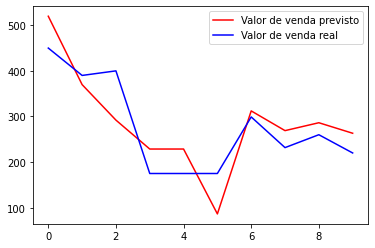

In [29]:
#Plotar gráfico do valor previsto vs o valor real
x = np.arange(len(y_test))
plt.plot(x, y_pred_new, label = "Valor de venda previsto", color = 'r')
plt.plot(x, y_test, label = "Valor de venda real", color = 'b')
plt.legend()
plt.show()

[Voltar ao topo](#Topo)

<a name="Item-10"></a>
## 10. Criar uma interface para testar o modelo usando o Gradio

In [54]:
#function to predict the input hours
def predict_venda(Vaga, Area_util):
    X = np.array([Vaga, Area_util]) #entrada do modelo 
    pred_venda = lin_reg_new.predict(X.reshape(1,-1)) #previsão
    return np.round(pred_venda[0], 2)

gr.Interface( fn = predict_venda,
              inputs = [gr.inputs.Number(label = 'Quantidade de vagas'), gr.inputs.Slider(27, 550, label = 'Área útil (m2)')],
              outputs = gr.outputs.Textbox(label='Valor de venda previsto (kR$)')
            ).launch();

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please i

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://15832.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


[Voltar ao topo](#Topo)